# EDA- Firearm Background Checks & Firearm Mortality Rate in 2017

The objective of this EDA are:  
    1) Determine which states give out the most firearm permit  
    2) Investigate the number of permits licsened correlates with the firarm death mortality rate.  
    3) Find high school graduation rate it associated with permits and death mortality rate

In [48]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 200)
# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in three files
guns = pd.read_csv("nics-firearm-background-checks.csv")
mortality = pd.read_csv("Firearm Mortality by State.csv")
highschool = pd.read_csv("graduationbystate.csv")

In [3]:
# Check innformation for guns file
guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 27 columns):
month                        13860 non-null object
state                        13860 non-null object
permit                       13836 non-null float64
permit_recheck               2475 non-null float64
handgun                      13840 non-null float64
long_gun                     13841 non-null float64
other                        6875 non-null float64
multiple                     13860 non-null int64
admin                        13837 non-null float64
prepawn_handgun              11917 non-null float64
prepawn_long_gun             11915 non-null float64
prepawn_other                6490 non-null float64
redemption_handgun           11920 non-null float64
redemption_long_gun          11919 non-null float64
redemption_other             6490 non-null float64
returned_handgun             3575 non-null float64
returned_long_gun            3520 non-null float64
returned_other   

In [39]:
# Check the dimension of the data and the missing rows
print(guns.shape)
print('-----------------------------------')
guns.isnull().sum().head()

(13860, 29)
-----------------------------------


month                 0
state                 0
permit               24
permit_recheck    11385
handgun              20
dtype: int64

Gun file has 13860 rows and 29 columns. Permit_recheck is missing 11385 rows.

In [5]:
# Let's look at the first 5 rows of Gun file
guns.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2019-10,Alabama,25615.0,635.0,16759.0,13692.0,1078.0,938,0.0,31.0,...,0.0,0.0,0.0,34.0,24.0,6.0,0.0,1.0,0.0,63254
1,2019-10,Alaska,168.0,5.0,3304.0,3510.0,392.0,302,0.0,0.0,...,0.0,0.0,0.0,23.0,9.0,0.0,1.0,0.0,0.0,8281
2,2019-10,Arizona,5151.0,686.0,11543.0,7509.0,1138.0,798,0.0,12.0,...,0.0,0.0,0.0,21.0,13.0,3.0,0.0,0.0,0.0,28833
3,2019-10,Arkansas,3031.0,825.0,4809.0,7173.0,351.0,391,3.0,12.0,...,0.0,0.0,0.0,13.0,11.0,2.0,0.0,1.0,0.0,19303
4,2019-10,California,36057.0,0.0,32128.0,23005.0,4198.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96252


In [6]:
# Converting string to date format
date = pd.to_datetime(guns.month)

In [7]:
#extracting year
guns['year'] = date.dt.year

In [8]:
guns['months'] = date.dt.month

In [9]:
guns.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,2019-10,Alabama,25615.0,635.0,16759.0,13692.0,1078.0,938,0.0,31.0,...,0.0,34.0,24.0,6.0,0.0,1.0,0.0,63254,2019,10
1,2019-10,Alaska,168.0,5.0,3304.0,3510.0,392.0,302,0.0,0.0,...,0.0,23.0,9.0,0.0,1.0,0.0,0.0,8281,2019,10
2,2019-10,Arizona,5151.0,686.0,11543.0,7509.0,1138.0,798,0.0,12.0,...,0.0,21.0,13.0,3.0,0.0,0.0,0.0,28833,2019,10
3,2019-10,Arkansas,3031.0,825.0,4809.0,7173.0,351.0,391,3.0,12.0,...,0.0,13.0,11.0,2.0,0.0,1.0,0.0,19303,2019,10
4,2019-10,California,36057.0,0.0,32128.0,23005.0,4198.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96252,2019,10


In [10]:
guns2017 = guns[guns['year'] == 2017]

In [49]:
# To merge this dataset with mortality dataset, do the necessary changes
guns2017['state'] = guns2017['state'].str.lower().str.replace(' ','')

In [15]:
#Top 5 gun permit states
permit2017bystate = guns2017.pivot_table(values='totals', index= 'state',aggfunc=np.sum).reset_index()
permit2017bystate.sort_values("totals", ascending=False).head()

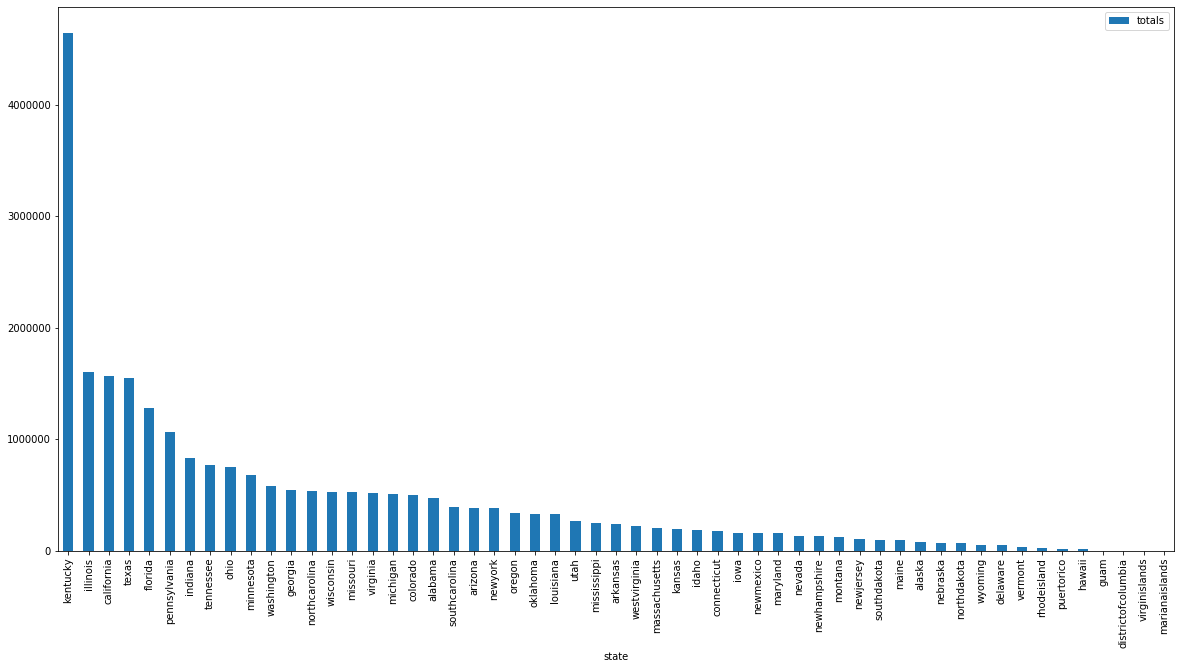

In [50]:
# Visualization of permits by states
plt.rcParams['figure.figsize'] = [20,10]
guns2017.groupby('state').sum().reset_index().sort_values(by='totals',ascending=False).plot.bar(x='state',y='totals')

Kentucky state gives out nearly half of the total firearm permits given in the united states.  
Illinois, California, and Texas are in the similar range.

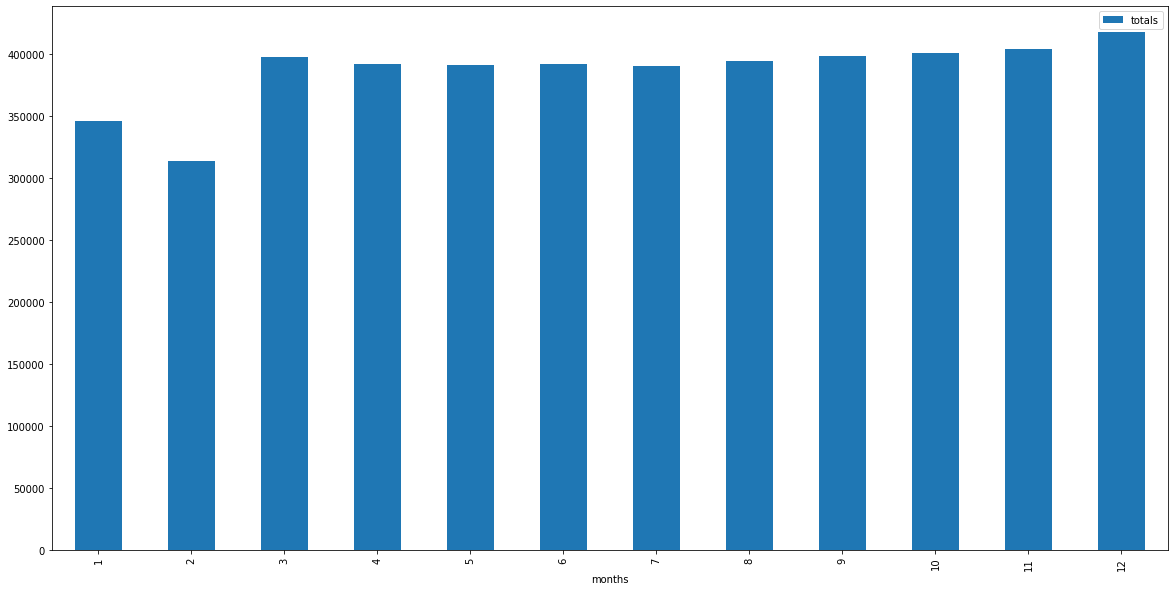

In [13]:
# Kentucky
guns2017.groupby('state').get_group("kentucky").sort_values(by='months',ascending=True).plot.bar(x='months',y='totals')

Kentucky is pretty consistent giving out firearm permits throught the year of 2017 except in January and February. Even still the lowest permit given out in February is still over 300,000.

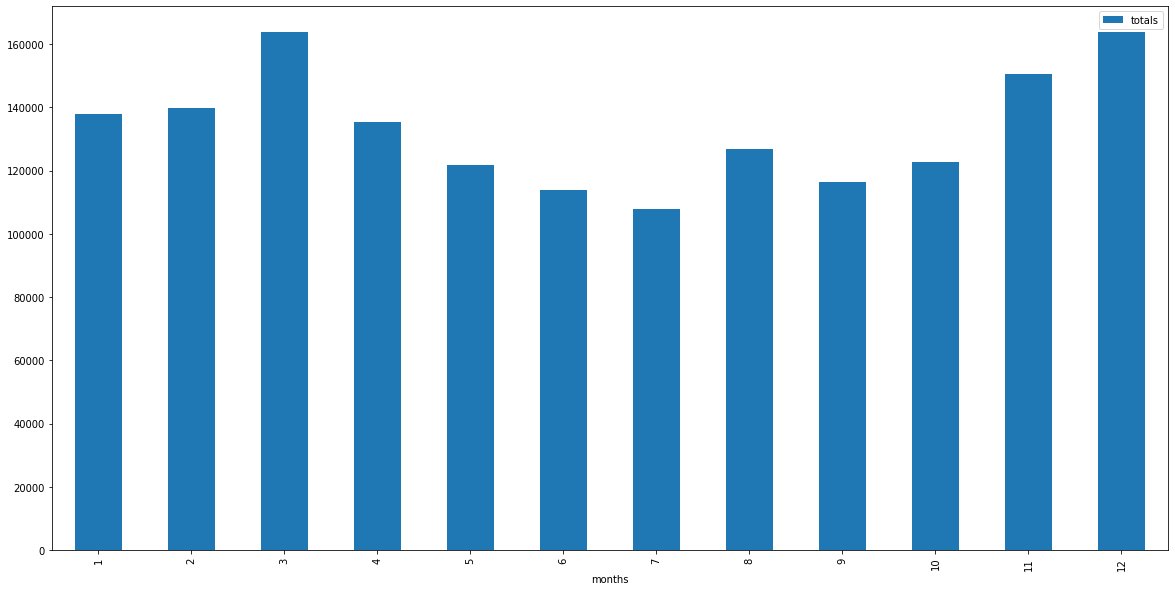

In [14]:
# Illinois
guns2017.groupby('state').get_group("illinois").sort_values(by='months',ascending=True).plot.bar(x='months',y='totals')

Illinois gave out the permits the most in March and December. However, it's not even near the half of permits given out by Kentucky states in both March and December.

# Mortality

In [17]:
mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 5 columns):
YEAR      250 non-null float64
STATE     250 non-null object
RATE      250 non-null float64
DEATHS    250 non-null object
URL       250 non-null object
dtypes: float64(2), object(3)
memory usage: 9.9+ KB


In [95]:
mortality.state.value_counts()

alabama          5
iowa             5
newjersey        5
northcarolina    5
arkansas         5
florida          5
michigan         5
maine            5
delaware         5
indiana          5
newyork          5
vermont          5
washington       5
missouri         5
nebraska         5
rhodeisland      5
texas            5
minnesota        5
louisiana        5
montana          5
wisconsin        5
alaska           5
southcarolina    5
utah             5
newhampshire     5
hawaii           5
arizona          5
colorado         5
idaho            5
oregon           5
newmexico        5
ohio             5
westvirginia     5
mississippi      5
tenessee         5
massachusetts    5
kentucky         5
georgia          5
connecticut      5
southdakota      5
california       5
nevada           5
maryland         5
illinois         5
pennsylvania     5
oklahoma         5
virginia         5
kansas           5
wyoming          5
northdakota      5
Name: state, dtype: int64

In [67]:
# Using regular expression to extract the state name in URL
pattern = r"(?<=/nchs/pressroom/states/)\b(/w+)\b(?=/.+)"
mortality['state'] = mortality.URL.str.extract(r"(?<=/nchs/pressroom/states/)(\w.+)(?=\/.+)")

In [68]:
# Choosing the year 2017
mortality2017 = mortality[mortality.YEAR == 2017.0]

In [77]:
mortality['YEAR'] = mortality2017['YEAR'] = 2017

In [78]:
mortality2017.head()

,YEAR,STATE,RATE,DEATHS,URL,state
0,2017,AL,22.9,"1,124",/nchs/pressroom/states/alabama/alabama.htm,alabama
1,2017,AK,24.5,180,/nchs/pressroom/states/alaska/alaska.htm,alaska
2,2017,AZ,15.8,"1,134",/nchs/pressroom/states/arizona/arizona.htm,arizona
3,2017,AR,20.3,613,/nchs/pressroom/states/arkansas/arkansas.htm,arkansas
4,2017,CA,7.9,"3,184",/nchs/pressroom/states/california/california.htm,california


In [74]:
# Make a copy of the orginial dataframe excluding the URL
mortality2017copy = mortality2017.copy()[['YEAR','state','RATE','DEATHS']]

In [72]:
mortality2017copy.shape

(251, 4)

In [91]:
# Mortality data consists of 5 different rate and deaths number for each state. Rate will be averaged and Deaths will be summed.
mortality2017copy[mortality2017copy["state"] == "washington"]

,YEAR,state,RATE,DEATHS
46,2017,washington,11.1,849
96,2017,washington,9.0,686
146,2017,washington,9.8,718
196,2017,washington,9.7,702
246,2017,washington,8.8,567


In [127]:
# Find the type of each column before aggregating. DEATHS column is a string. This column needs to be converted to integer for summation.
mortality2017copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 250
Data columns (total 4 columns):
YEAR      251 non-null int64
state     250 non-null object
RATE      250 non-null float64
DEATHS    250 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 19.8+ KB


In [128]:
# There was comma for every thousand. This was removed and converted to integer
mortality2017copy["DEATHS"] = mortality2017copy['DEATHS'].str.replace(',','').dropna().astype('int64')

AttributeError: Can only use .str accessor with string values!

In [130]:
# Aggregating by state
mort2017 = mortality2017copy.groupby('state').agg({'RATE':'mean','DEATHS':'sum'}).reset_index()
mort2017.head(5)

,state,RATE,DEATHS
0,alabama,19.38,4679.0
1,alaska,21.58,795.0
2,arizona,14.88,5059.0
3,arkansas,17.46,2609.0
4,california,8.08,15858.0


# Merge Gun Permit Dataset and Mortality Dataset

In [131]:
# Merge two dataset by using the state column
merged2017 = pd.merge(permit2017bystate,mort2017,how='outer', on = 'state')
merged2017.head()

,state,totals,RATE,DEATHS
0,alabama,477345.0,19.38,4679.0
1,alaska,80839.0,21.58,795.0
2,arizona,384930.0,14.88,5059.0
3,arkansas,237629.0,17.46,2609.0
4,california,1570110.0,8.08,15858.0


In [124]:
# Drop States that have no data
merged2017 = merged2017.dropna().sort_values(by='totals',ascending=False)
totalstop5 = merged2017.head()
totalstop5

,state,totals,RATE,DEATHS
18,kentucky,4641480.0,15.16,3378.0
14,illinois,1601087.0,10.06,6451.0
4,california,1570110.0,8.08,15858.0
46,texas,1549434.0,11.60,15407.0
9,florida,1276549.0,11.70,12235.0


In [125]:
# Sort by the RATE column (death rates per 100,000 people)
deaths_top5 = merged2017.sort_values(by='RATE',ascending=False)
deaths_top5.head()

,state,totals,RATE,DEATHS
1,alaska,80839.0,21.58,795.0
19,louisiana,329201.0,20.18,4701.0
0,alabama,477345.0,19.38,4679.0
26,mississippi,251852.0,19.06,2810.0
28,montana,123938.0,18.72,976.0


Text(0.5, 1.0, 'Top 5 Permits given by States given Deaths')

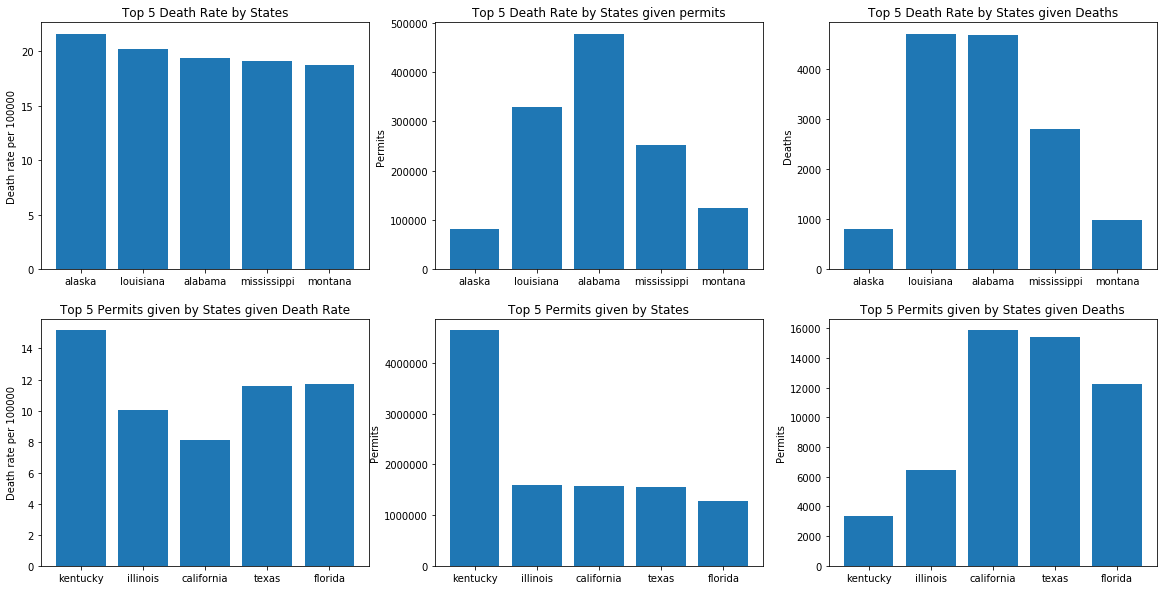

In [140]:
# Make Visulisation for top 5 death rate
top5 = deaths_top5.head()
fig, ax = plt.subplots(2,3)
ax[0,0].bar(top5.state,top5.RATE)
ax[0,0].set_ylabel('Death rate per 100000')
ax[0,0].set_title('Top 5 Death Rate by States')

ax[0,1].bar(top5.state,top5.totals)
ax[0,1].set_ylabel('Permits')
ax[0,1].set_title('Top 5 Death Rate by States given permits')

ax[0,2].bar(top5.state,top5.DEATHS)
ax[0,2].set_ylabel('Deaths')
ax[0,2].set_title('Top 5 Death Rate by States given Deaths')


ax[1,0].bar(totalstop5.state,totalstop5.RATE)
ax[1,0].set_ylabel('Death rate per 100000')
ax[1,0].set_title('Top 5 Permits given by States given Death Rate')

ax[1,1].bar(totalstop5.state,totalstop5.totals)
ax[1,1].set_ylabel('Permits')
ax[1,1].set_title('Top 5 Permits given by States')

ax[1,2].bar(totalstop5.state,totalstop5.DEATHS)
ax[1,2].set_ylabel('Permits')
ax[1,2].set_title('Top 5 Permits given by States given Deaths')

Ironically, Alaska, which gave one of the lowest number of gun permits, has the highet death rate. On the other hand, Kentucky, which was given the most gun permits to citizens, has one of the lowest deaths and lower death rates comparaed to alaska. There is no correlation for the higher number of permits with the higher mortality rate in the given states. Alaska is one of the lowest states with firearm permits (N = 80839); yet, the mortality rate (24.5 deaths per 100,000) is at the highest out of united states. On the contrary, Kentucky, which has given out the most firearm permits (N= 4,641,480) has the rank of 14th in the united states. (16.2 deaths per 100,000).

# High School Rate vs Gun Permit vs Mortality Data

Now let's check if graduation rate is associated with gun permits or mortatlity rate.

In [141]:
highschool.head()

,state,graduation rate
0,alabama,89.3
1,alaska,78.2
2,arizona,78.0
3,arkansas,88.0
4,california,82.7


In [142]:
# make lowercase for state so we  can merge the data & get rid of white spaces
highschool.state = highschool.state.str.lower().str.replace(' ','')
highschool.head()

,state,graduation rate
0,alabama,89.3
1,alaska,78.2
2,arizona,78.0
3,arkansas,88.0
4,california,82.7


In [143]:
merged2017.head(1)

,state,totals,RATE,DEATHS
0,alabama,477345.0,19.38,4679.0


In [144]:
education = pd.merge(merged2017,highschool,how='outer', on = 'state')

In [145]:
education = education.dropna()

In [146]:
education1 = education.sort_values(by='graduation rate',ascending=False).reset_index()

In [148]:
education1.drop('index',axis=1).head()

,state,totals,RATE,DEATHS,graduation rate
0,iowa,160981.0,8.04,1270.0,91.0
1,newjersey,103739.0,5.34,2340.0,90.5
2,texas,1549434.0,11.60,15407.0,89.7
3,kentucky,4641480.0,15.16,3378.0,89.7
4,westvirginia,222768.0,15.70,1505.0,89.4


In [149]:
education1.drop('index',axis=1).tail()

,state,totals,RATE,DEATHS,graduation rate
44,alaska,80839.0,21.58,795.0,78.2
45,louisiana,329201.0,20.18,4701.0,78.1
46,arizona,384930.0,14.88,5059.0,78.0
47,oregon,341167.0,11.56,2426.0,76.7
48,newmexico,159779.0,17.02,1774.0,71.1


The highest high school graduation rate is at 91% at iowa state and Iowa state is at 71.1% at New Mexico state. However, the graduation rate does not correlate with the death rate. Also, the graduation rate does not correlate with the permits. This concludes my eda.